# Network Science in the Humanities

This notebook is part of a set of notebooks for the practice lectures of the course **Network Science in the Humanities**. This course is part of the **MA Digital Methodoly in the Humanities and Cultural Sciences**, an inter-university degree program between the Johannes Gutenberg University Mainz and the University of Applied Sciences Mainz. They are a guide for the programming exercises for modeling, analyzing and visualizing networks.

Link to the MA website: https://www.studying.uni-mainz.de/digital-methodology-in-the-humanities-and-cultural-sciences-m-a/

## Practice Lecture 04 – Influence, centrality, control

In this lecture we will cover: 
- eigenvector centrality,
- closeness centrality,
- betweenness centrality.
- all together: let's add the analysis of these three centrality measures to the ones in the previous lectures, so we can continue to analyse and compare the neworks with which we have been working.

In [4]:
# First, let's use the network of directors as example

import pandas as pd
df = pd.read_csv('data/board-director.csv')

directors = list(df['director'])
boards = list(df['board'])

In [5]:
# Let's create the network again using the function below
import networkx as nx

def create_bip_net(top,bottom):
    
    B = nx.Graph()
    
    # we create a for loop for the entire dataframe connecting the cells of each row
    for i in range(len(top)):
        B.add_node(top[i], bipartite=0)
        B.add_node(bottom[i], bipartite=1)
        B.add_edge(top[i], bottom[i])
        
    # Note that we used attributes of nodes to define the set that they belong to:
    # boards (that we also call top nodes) are in the set 0
    # directors (that we also call bottom nodes) are in the set 1
    
    return B

In [6]:
# We call the function, split the set of nodes and built the projection onto the bottom nodes
B = create_bip_net(boards,directors)

top_nodes = set(node for node,d in B.nodes(data=True) if d['bipartite']==0) 
bottom_nodes = set(B) - top_nodes

G = nx.projected_graph(B, bottom_nodes)

In [35]:
# Fortunately, the package networkx comes with all the functions we will need here. All these functions return 
# dictionary keyed by nodes with the values of the dictionary corresponding to the centrality of the node. So:
# Eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)

# And let's check the 10 highest values:
sorted(eigenvector.items(), key = lambda x:x[1], reverse=True)[:20]

[('bottom_3648', 0.3533343603216754),
 ('bottom_5065', 0.2697574481820783),
 ('bottom_1615', 0.2594023454575109),
 ('bottom_556', 0.2594023454575109),
 ('bottom_2337', 0.2594023454575109),
 ('bottom_2058', 0.2594023454575109),
 ('bottom_1687', 0.2594023454575109),
 ('bottom_2788', 0.2594023454575109),
 ('bottom_843', 0.2594023454575109),
 ('bottom_4668', 0.2594023454575109),
 ('bottom_3461', 0.2594023454575109),
 ('bottom_812', 0.2594023454575109),
 ('bottom_4961', 0.12259879822160803),
 ('bottom_2826', 0.10865208383198656),
 ('bottom_3474', 0.10557095024088228),
 ('bottom_1338', 0.09324282935177917),
 ('bottom_209', 0.09324282935177917),
 ('bottom_617', 0.09324282935177917),
 ('bottom_1563', 0.09324282935177917),
 ('bottom_5196', 0.09324282935177917)]

In [37]:
# Closeness centrality
closeness = nx.closeness_centrality(G)
# And let's check the 10 highest values:
sorted(closeness.items(), key = lambda x:x[1], reverse=True)[:20]

[('bottom_4961', 0.14213459148803978),
 ('bottom_4249', 0.1378274826550689),
 ('bottom_3950', 0.1331738509537107),
 ('bottom_2826', 0.1308610857868111),
 ('bottom_2117', 0.12995162650335065),
 ('bottom_1357', 0.12846363078002984),
 ('bottom_2281', 0.1280725694991165),
 ('bottom_2051', 0.12800762397705812),
 ('bottom_3245', 0.12736177320018097),
 ('bottom_718', 0.12736177320018097),
 ('bottom_3648', 0.1242890371653169),
 ('bottom_4113', 0.1235589987678701),
 ('bottom_3474', 0.12334768359773206),
 ('bottom_5069', 0.12325734105603449),
 ('bottom_3610', 0.12268823061130432),
 ('bottom_3054', 0.12242048229037761),
 ('bottom_1338', 0.12182964984689124),
 ('bottom_209', 0.12182964984689124),
 ('bottom_617', 0.12182964984689124),
 ('bottom_1563', 0.12182964984689124)]

In [38]:
# And betweenness centrality
betweenness = nx.betweenness_centrality(G)
sorted(betweenness.items(), key = lambda x:x[1], reverse=True)[:20]

[('bottom_4961', 0.08451095380786183),
 ('bottom_3950', 0.06626278327322628),
 ('bottom_4249', 0.06514451579191224),
 ('bottom_2268', 0.06428726323061096),
 ('bottom_472', 0.05665724801111378),
 ('bottom_2051', 0.04921565307950355),
 ('bottom_2066', 0.04839059950794844),
 ('bottom_569', 0.042421187135261156),
 ('bottom_2826', 0.03900998641682306),
 ('bottom_5069', 0.03714072392331168),
 ('bottom_1357', 0.035678295388871885),
 ('bottom_1290', 0.032739730666428796),
 ('bottom_5134', 0.03250597371393584),
 ('bottom_3777', 0.030396273399811862),
 ('bottom_3488', 0.030032411216064862),
 ('bottom_1047', 0.03000228013080991),
 ('bottom_2606', 0.029989733144350477),
 ('bottom_1452', 0.029651973686129433),
 ('bottom_2117', 0.027868849039022828),
 ('bottom_3610', 0.026931305188615674)]

<function matplotlib.pyplot.show(*args, **kw)>

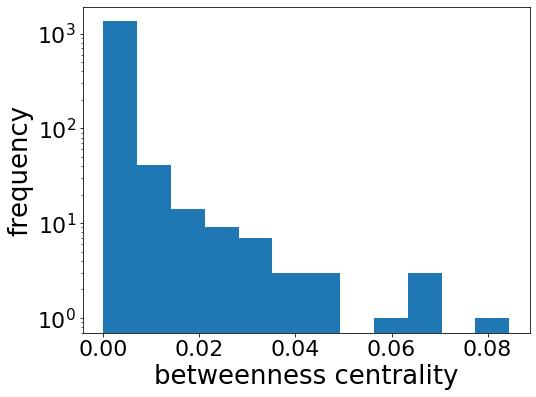

In [41]:
# Then, let's plot the distribution of the betweeness centrality
import matplotlib.pyplot as plt

# Let's take the list of values in the dictionary
x = betweenness.values()

# let'S make the bin in automatic mode
n_bins = 'auto'

# Let's plot
plt.figure(figsize=(8,6))
plt.hist(x, bins=n_bins)

#plt.ylim(0,10)

# giving a new face to the figure
plt.xlabel('betweenness centrality', fontsize=26)
plt.ylabel('frequency', fontsize=26)
plt.yscale('log')

plt.tick_params(axis='both', which='major', labelsize=22)



plt.show

## Assignment!

###  Exercise 1: Perform network analysis for the models and real-world networks.

- By now, you have already done network analysis using degree distributions, clustering and path lenght, for the random graph and preferential attachment models, and for the airport and pathogen networks. Add these three new metrics to your analysis

- When put all together, write your observations. What are the differences? How are the properties of real-worlds networks similar to the properties fo the models? Why?